In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1.Data Preparation

In [2]:
def load_csv(path, date_col="Date"):
    df = pd.read_csv(path, parse_dates=[date_col], index_col=date_col).dropna()
    return df

### Load Crypto data

In [3]:
df_bnb = load_csv("data/crypto/BNB-USD.csv")
df_btc = load_csv("data/crypto/BTC-USD.csv")
df_eth = load_csv("data/crypto/ETH-USD.csv")
df_usdc = load_csv("data/crypto/USDC-USD.csv")
df_sol = load_csv("data/crypto/SOL-USD.csv")
df_ada = load_csv("data/crypto/ADA-USD.csv")
df_ada.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200
2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780
2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220
2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250
2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440


### Load macro variables

In [4]:
df_euro_r = load_csv("data/macro_variables/euro exchnage rate data.csv")
df_fed_r = load_csv("data/macro_variables/Fed_interest_rate.csv", date_col="DATE")
df_gold = load_csv("data/macro_variables/gold price.csv")
df_sp500 = load_csv("data/macro_variables/S&p_500_index.csv")
df_sp500.head()

,Open,High,Low,Close
Date,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83
2017-01-04,2261.60,2272.82,2261.60,2270.75
2017-01-05,2268.18,2271.50,2260.45,2269.00
2017-01-06,2271.14,2282.10,2264.06,2276.98
2017-01-09,2273.59,2275.49,2268.90,2268.90


In [5]:
df_macro_variables = load_csv("data/macro_variables/macro_indicators.csv", date_col="Unnamed: 0")
df_macro_variables.index = pd.to_datetime(df_macro_variables.index)
df_macro_variables.head()

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
2010-08-18,0.006329,0.020820,0.000638,0.003814,-0.00596,-0.011558,0.19,0.16,1.46,2.64,...,0.018686,0.09776,0.032201,-0.012493,146.405698,-0.004313,0.029215,19.67,-0.003546,0.17855
2010-08-19,0.006329,0.020820,0.000638,0.003814,-0.00596,-0.011558,0.19,0.16,1.41,2.58,...,0.018686,0.09776,0.032201,-0.012493,146.405698,-0.004313,0.029215,19.67,-0.003546,0.17855
2010-08-20,0.006329,0.020820,0.000638,0.003814,-0.00596,-0.011558,0.20,0.15,1.47,2.62,...,0.018686,0.09776,0.032201,-0.012493,146.405698,-0.004313,0.029215,19.67,-0.003546,0.17855
2010-08-23,0.028153,0.033316,-0.006001,0.000700,-0.00596,-0.011558,0.19,0.16,1.43,2.60,...,0.018686,0.09776,0.032201,-0.012493,146.405698,-0.004313,0.029215,19.67,-0.003546,0.17855
2010-08-24,0.028153,0.033316,-0.006001,0.000700,-0.00596,-0.011558,0.19,0.16,1.36,2.50,...,0.018686,0.09776,0.032201,-0.012493,146.405698,-0.004313,0.029215,19.67,-0.003546,0.17855


# 2. Feature Engineering

### Create crypto returns

In [6]:
# these are lags we use to calculate return (10 lags that capture short and long term past returns)
lags = {
    #"5d":5,
    "2w":14,
    "3w":21,
    "1m":30,
    "2m":30*2,
    "3m":30*3,
    "6m":30*6,
    "9m":30*9,
    "1y":30*12,
    "2y":30*12*2
}

In [7]:
def calculate_returns(df_returns, df_stock, stock_label):
    for lag_label, lag in lags.items(): 
        df_returns[f"return_{stock_label}_{lag_label}"] = df_stock["Adj Close"].pct_change(lag).add(1).pow(1/lag).sub(1).dropna()

In [8]:
df_returns=pd.DataFrame()
calculate_returns(df_returns, df_bnb, "bnb")
calculate_returns(df_returns, df_btc, "btc")
calculate_returns(df_returns, df_eth, "eth")
calculate_returns(df_returns, df_usdc, "usdc")
calculate_returns(df_returns, df_sol, "sol")
calculate_returns(df_returns, df_ada, "ada")
df_returns = df_returns.dropna()

In [9]:
df_returns.head()

,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,return_btc_2w,...,return_sol_2y,return_ada_2w,return_ada_3w,return_ada_1m,return_ada_2m,return_ada_3m,return_ada_6m,return_ada_9m,return_ada_1y,return_ada_2y
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,0.006481,0.006782,0.001628,0.002125,-0.001959,0.000011,0.001231,0.000427,0.004791,0.007613,...,0.006772,0.022451,0.016706,0.005717,0.001599,-0.001527,-0.003765,-0.000905,-0.000171,0.004925
2022-04-01,0.008328,0.008718,0.002936,0.002904,-0.001845,0.000204,0.001445,0.000281,0.004840,0.007299,...,0.007183,0.022505,0.018679,0.007239,0.001703,-0.001852,-0.003655,-0.000692,-0.000206,0.004948
2022-04-02,0.006358,0.007599,0.002737,0.002092,-0.002172,0.000144,0.001144,0.000427,0.004753,0.005989,...,0.006982,0.017953,0.018252,0.008280,0.001001,-0.001947,-0.003541,-0.000756,-0.000046,0.004918
2022-04-03,0.010188,0.010473,0.006186,0.003395,-0.001428,0.000095,0.001180,0.000207,0.004733,0.008526,...,0.007206,0.021782,0.019473,0.011447,0.002370,-0.001203,-0.003510,-0.000623,-0.000077,0.004983
2022-04-04,0.008694,0.008652,0.005040,0.003136,-0.001397,0.000153,0.001356,-0.000035,0.004679,0.009085,...,0.007386,0.020197,0.019779,0.011307,0.002305,-0.000869,-0.003333,-0.000342,0.000022,0.005020


In [10]:
df_returns.describe()

,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,return_btc_2w,...,return_sol_2y,return_ada_2w,return_ada_3w,return_ada_1m,return_ada_2m,return_ada_3m,return_ada_6m,return_ada_9m,return_ada_1y,return_ada_2y
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,-0.000344,0.001171,0.002090,0.001000,-0.000817,-0.000516,0.001140,-0.000581,0.004542,-0.003121,...,0.007091,-0.004435,-0.000270,0.002971,-0.000686,-0.002477,-0.004327,-0.000915,-0.000693,0.004438
std,0.005175,0.004916,0.002511,0.001124,0.001031,0.000551,0.000234,0.000482,0.000140,0.006586,...,0.000156,0.013611,0.012847,0.007125,0.001628,0.001297,0.000477,0.000339,0.000404,0.000389
min,-0.007137,-0.006832,-0.003675,-0.000866,-0.002172,-0.001678,0.000593,-0.001316,0.004365,-0.012494,...,0.006772,-0.018289,-0.016381,-0.011813,-0.003740,-0.006120,-0.004882,-0.001696,-0.001364,0.003897
25%,-0.004500,-0.002698,0.000619,0.000529,-0.001803,-0.000991,0.001062,-0.000889,0.004429,-0.009072,...,0.006981,-0.014152,-0.010873,-0.000028,-0.001935,-0.003296,-0.004705,-0.001067,-0.001018,0.004052
50%,-0.002470,0.000462,0.002450,0.000761,-0.001150,-0.000635,0.001162,-0.000674,0.004521,-0.004046,...,0.007071,-0.009957,-0.006348,0.005098,-0.000976,-0.002249,-0.004496,-0.000878,-0.000721,0.004379
75%,0.002447,0.004374,0.003986,0.001839,-0.000116,0.000084,0.001265,-0.000425,0.004626,0.000809,...,0.007188,-0.002263,0.011365,0.008380,0.000597,-0.001596,-0.004036,-0.000704,-0.000411,0.004774
max,0.010188,0.010473,0.006186,0.003395,0.001423,0.000223,0.001688,0.000427,0.004840,0.009085,...,0.007437,0.022505,0.019779,0.011788,0.002370,-0.000602,-0.003333,-0.000342,0.000022,0.005020


### Prepare macro_variables

In [11]:
df_factors = pd.DataFrame()

In [12]:
df_factors["return_gold_2w"] = df_gold["Close/Last"].pct_change(14).add(1).pow(1/14).sub(1).dropna()
df_factors["euro_r"] = df_euro_r[" Close"]/100
df_factors["fed_dff"] = df_fed_r["DFF"]/100
df_factors["return_sp500_2w"] = df_sp500[" Close"].pct_change(14).add(1).pow(1/14).sub(1).dropna()
df_factors = df_factors.dropna()
df_factors.describe()

,return_gold_2w,euro_r,fed_dff,return_sp500_2w
count,1245.000000,1245.000000,1245.000000,1245.000000
mean,-0.000346,0.011547,0.010537,0.000529
std,0.002191,0.000410,0.009005,0.002995
min,-0.011498,0.010693,0.000400,-0.020975
25%,-0.001614,0.011216,0.000900,-0.000366
50%,-0.000277,0.011555,0.011600,0.000998
75%,0.001074,0.011842,0.019100,0.001903
max,0.007571,0.012507,0.024500,0.015150


In [13]:
df_macro_variables.describe()

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
count,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,...,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000
mean,0.004137,0.025337,0.001363,0.007633,0.002541,0.011133,0.548138,0.507831,1.450009,2.120468,...,0.007607,0.036854,0.020866,0.080978,190.157652,0.005036,0.057370,27.255768,0.004904,0.054005
std,0.073198,0.190883,0.005401,0.011064,0.010002,0.039059,0.729116,0.739997,0.652684,0.644368,...,0.042976,0.069881,0.072718,0.087929,39.256862,0.005685,0.057504,4.833265,0.026538,0.089752
min,-0.099074,-0.099074,-0.015082,-0.017196,-0.017409,-0.034123,0.040000,-0.050000,0.190000,0.520000,...,-0.062291,-0.077123,-0.212686,-0.040928,136.622587,-0.011356,-0.046477,19.670000,-0.115152,-0.186395
25%,-0.015467,-0.004663,-0.002206,0.001825,-0.001390,-0.003139,0.090000,0.040000,0.900000,1.710000,...,-0.008840,0.000591,0.001322,0.023769,157.831104,0.002250,0.027441,23.410000,-0.008163,-0.024906
50%,0.007688,0.012521,0.001459,0.007460,0.000651,0.002109,0.140000,0.100000,1.470000,2.150000,...,0.006958,0.017940,0.019112,0.055786,186.957120,0.004205,0.052284,26.690000,0.008718,0.065848
75%,0.031076,0.027570,0.004462,0.012508,0.003386,0.017588,0.910000,0.720000,1.800000,2.580000,...,0.013721,0.046132,0.034800,0.151526,214.568614,0.007335,0.070894,30.200000,0.021898,0.115815
max,2.118341,2.505427,0.026035,0.086050,0.125544,0.476813,2.450000,2.430000,3.090000,3.750000,...,0.257387,0.314073,0.295036,0.349151,291.954574,0.019193,0.200392,39.980000,0.062705,0.281967


### Calculate factor betas

* The objectif is to calculate factor betas for each stock and include them as features for our machine learning model later

In [14]:
df_return_usdc = pd.DataFrame()
calculate_returns(df_returns=df_return_usdc, df_stock=df_usdc, stock_label="usdc")
df_return_usdc.head()

,return_usdc_2w,return_usdc_3w,return_usdc_1m,return_usdc_2m,return_usdc_3m,return_usdc_6m,return_usdc_9m,return_usdc_1y,return_usdc_2y
Date,,,,,,,,,
2018-10-22,0.000504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-23,0.000264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-24,0.000028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-25,-0.000128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-26,-0.000077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

In [16]:
df_factors_usdc = df_macro_variables.join(df_return_usdc["return_usdc_2w"]).dropna().sort_index()
df_factors_usdc.head()

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,...,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy,return_usdc_2w
2018-10-23,0.035608,0.049687,-0.003798,-0.003098,-0.000350,-0.008399,2.2,2.29,3.01,3.17,...,0.006179,0.031375,0.068922,212.925127,0.002277,0.052474,32.62,0.007101,0.081206,0.000264
2018-10-24,0.035608,0.049687,-0.003798,-0.003098,-0.000569,-0.008315,2.2,2.29,2.94,3.10,...,0.006179,0.031375,0.068922,212.925127,0.002277,0.052474,32.62,0.007101,0.081206,0.000028
2018-10-25,0.035608,0.049687,-0.003798,-0.003098,-0.000569,-0.008315,2.2,2.29,2.98,3.14,...,0.006179,0.031375,0.068922,212.925127,0.002277,0.052474,32.62,0.007101,0.081206,-0.000128
2018-10-26,0.035608,0.049687,-0.003798,-0.003098,-0.000569,-0.008315,2.2,2.28,2.91,3.08,...,0.006179,0.031375,0.068922,212.925127,0.002277,0.052474,32.62,0.007101,0.081206,-0.000077
2018-10-29,0.041047,0.056396,-0.002594,0.002770,-0.000569,-0.008315,2.2,2.30,2.91,3.08,...,0.006179,0.031375,0.068922,212.925127,0.002277,0.052474,32.62,0.007101,0.081206,-0.001293


In [17]:
betas_usdc = (RollingOLS(endog=df_factors_usdc.return_usdc_2w,
    exog=sm.add_constant(df_factors_usdc.drop("return_usdc_2w", axis=1)),
     window=252)
     .fit(params_only=True)
     .params)
     #.drop('const', axis=1))

betas_usdc = betas_usdc.fillna(betas_usdc.mean())
betas_usdc

,const,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
2018-10-23,-1.239537e+06,0.014392,0.000904,0.029798,-0.014560,0.005662,0.002179,0.000562,-0.001585,0.000298,...,1180.727297,-651.738672,1032.048386,-167.624162,0.127769,3761.764730,-302.619360,-0.000001,-0.007120,-0.005591
2018-10-24,-1.239537e+06,0.014392,0.000904,0.029798,-0.014560,0.005662,0.002179,0.000562,-0.001585,0.000298,...,1180.727297,-651.738672,1032.048386,-167.624162,0.127769,3761.764730,-302.619360,-0.000001,-0.007120,-0.005591
2018-10-25,-1.239537e+06,0.014392,0.000904,0.029798,-0.014560,0.005662,0.002179,0.000562,-0.001585,0.000298,...,1180.727297,-651.738672,1032.048386,-167.624162,0.127769,3761.764730,-302.619360,-0.000001,-0.007120,-0.005591
2018-10-26,-1.239537e+06,0.014392,0.000904,0.029798,-0.014560,0.005662,0.002179,0.000562,-0.001585,0.000298,...,1180.727297,-651.738672,1032.048386,-167.624162,0.127769,3761.764730,-302.619360,-0.000001,-0.007120,-0.005591
2018-10-29,-1.239537e+06,0.014392,0.000904,0.029798,-0.014560,0.005662,0.002179,0.000562,-0.001585,0.000298,...,1180.727297,-651.738672,1032.048386,-167.624162,0.127769,3761.764730,-302.619360,-0.000001,-0.007120,-0.005591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-21,-4.705173e+03,0.000010,0.001914,-0.001139,-0.001005,0.001688,-0.002090,0.000585,0.000285,-0.000267,...,-0.012815,0.016965,0.023006,0.009852,-0.000028,0.624902,-0.008492,-0.000047,0.001356,-0.000543
2022-03-22,8.536528e+03,-0.024380,0.001951,0.033671,-0.004647,-0.001888,0.004934,-0.000360,0.000383,-0.000283,...,-0.021530,0.018722,-0.110715,-0.108204,0.000040,-0.665325,-0.050849,-0.000050,0.001440,-0.000620
2022-03-23,4.058710e+05,-2.010766,1.134822,2.327629,-1.200617,-0.069759,0.011671,-0.025178,0.003004,-0.003346,...,-1.232681,0.832075,-29.877268,-11.136066,0.005933,-107.326811,-8.703278,-0.000056,0.001618,-0.000740
2022-03-24,6.875408e+03,-0.059508,0.019918,0.061841,-0.020731,0.001164,-0.001171,-0.000488,0.000215,-0.000367,...,-0.034749,0.025921,-0.619005,-0.087018,0.000073,-0.862309,-0.120840,-0.000055,0.001603,-0.000741


In [18]:
betas_usdc.describe()

,const,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
count,6.270000e+02,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,...,6.270000e+02,627.000000,627.000000,627.000000,627.000000,6.270000e+02,627.000000,627.000000,627.000000,627.000000
mean,-1.239537e+06,0.014392,0.000904,0.029798,-0.014560,0.005662,0.002179,0.000562,-0.001585,0.000298,...,1.180727e+03,-651.738672,1032.048386,-167.624162,0.127769,3.761765e+03,-302.619360,-0.000001,-0.007120,-0.005591
std,2.080109e+07,0.135182,0.079933,0.455212,0.140207,0.056006,0.029628,0.031824,0.005783,0.026629,...,5.106611e+04,22194.966234,12219.081189,3716.522198,2.159822,2.172579e+05,4507.067223,0.002180,0.005044,0.010988
min,-5.192458e+08,-2.010766,-0.674436,-1.745813,-2.079199,-0.430011,-0.447868,-0.079647,-0.035097,-0.157032,...,-3.696275e+05,-315851.056641,-15815.814758,-85537.598129,-5.091922,-2.928062e+06,-112515.288086,-0.037331,-0.029089,-0.172761
25%,-1.239537e+06,0.000229,-0.000376,-0.007658,-0.014560,-0.000162,-0.000397,-0.001210,-0.002499,-0.000634,...,-9.451896e-02,-651.738672,-0.176325,-167.624162,-0.000047,-4.076450e-01,-302.619360,-0.000001,-0.008813,-0.005591
50%,-2.576448e+05,0.014392,0.000734,0.029798,-0.014560,0.005662,0.002179,0.000562,-0.001585,0.000298,...,6.718724e-01,-0.597293,2.651106,-0.850947,0.000159,5.859073e+00,-1.344160,-0.000001,-0.007120,-0.005591
75%,1.912147e+04,0.014392,0.000904,0.029798,0.000167,0.005662,0.002179,0.000562,-0.001399,0.000298,...,1.180727e+03,0.012091,1032.048386,0.097762,0.127769,3.761765e+03,0.064528,0.000398,-0.007120,-0.000666
max,1.857794e+07,1.395797,1.134822,10.095730,1.132669,0.435154,0.415477,0.691443,0.109261,0.553921,...,1.171325e+06,359677.925964,285203.011139,34604.565247,53.846558,4.577175e+06,6620.779785,0.012011,0.025695,0.028116


In [21]:
data_usdc = df_return_usdc.join(betas_usdc.shift()).dropna()
data_usdc.head()

,return_usdc_2w,return_usdc_3w,return_usdc_1m,return_usdc_2m,return_usdc_3m,return_usdc_6m,return_usdc_9m,return_usdc_1y,return_usdc_2y,const,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29,0.000039,-0.000140,-0.000023,-0.000099,0.000003,5.266275e-06,-0.000017,0.000005,-0.000013,-135644.405633,...,-3.531206,1.643361,-1.122740,1.113304,0.001223,-44.346121,14.822312,0.000631,0.003408,-0.029517
2020-09-30,0.000185,-0.000063,-0.000111,0.000070,-0.000057,-5.663182e-07,-0.000033,-0.000036,-0.000013,44265.854545,...,0.114844,0.351166,0.101050,-0.505410,0.000095,0.979539,-0.683378,0.000615,0.003714,-0.029700
2020-10-01,0.000028,-0.000091,-0.000012,0.000058,0.000006,-4.244904e-06,-0.000028,-0.000013,-0.000016,-376649.563494,...,1.867116,2.619381,7.534890,-2.460453,0.002380,2.403231,4.615456,0.000334,-0.009631,-0.007713
2020-10-02,0.000061,-0.000048,0.000010,0.000007,0.000010,-5.644309e-06,-0.000010,-0.000014,-0.000010,-101331.668678,...,1.041750,0.531494,0.263464,0.221222,0.000077,-9.518444,1.427012,0.000340,-0.009698,-0.007562
2020-10-05,-0.000098,-0.000070,-0.000142,0.000004,0.000004,2.574778e-05,-0.000024,-0.000018,-0.000029,-42186.821299,...,-0.266075,0.134778,0.493447,0.170740,-0.000202,1.366738,-0.165659,0.000303,-0.009017,-0.007534


### Add Momentum factors

In [22]:
for lag_label, lag in list(lags.items())[1:]:
    data_usdc[f"momentum_{lag_label}"] = data_usdc[f"return_usdc_{lag_label}"].sub(data_usdc["return_usdc_2w"])

In [23]:
data_usdc.head()

,return_usdc_2w,return_usdc_3w,return_usdc_1m,return_usdc_2m,return_usdc_3m,return_usdc_6m,return_usdc_9m,return_usdc_1y,return_usdc_2y,const,...,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy,momentum_3w,momentum_1m,momentum_2m,momentum_3m,momentum_6m,momentum_9m,momentum_1y,momentum_2y
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29,0.000039,-0.000140,-0.000023,-0.000099,0.000003,5.266275e-06,-0.000017,0.000005,-0.000013,-135644.405633,...,0.003408,-0.029517,-0.000179,-0.000063,-0.000138,-0.000037,-0.000034,-0.000057,-0.000035,-0.000052
2020-09-30,0.000185,-0.000063,-0.000111,0.000070,-0.000057,-5.663182e-07,-0.000033,-0.000036,-0.000013,44265.854545,...,0.003714,-0.029700,-0.000248,-0.000296,-0.000115,-0.000243,-0.000186,-0.000218,-0.000221,-0.000198
2020-10-01,0.000028,-0.000091,-0.000012,0.000058,0.000006,-4.244904e-06,-0.000028,-0.000013,-0.000016,-376649.563494,...,-0.009631,-0.007713,-0.000119,-0.000040,0.000030,-0.000021,-0.000032,-0.000056,-0.000041,-0.000044
2020-10-02,0.000061,-0.000048,0.000010,0.000007,0.000010,-5.644309e-06,-0.000010,-0.000014,-0.000010,-101331.668678,...,-0.009698,-0.007562,-0.000109,-0.000051,-0.000054,-0.000051,-0.000067,-0.000071,-0.000075,-0.000071
2020-10-05,-0.000098,-0.000070,-0.000142,0.000004,0.000004,2.574778e-05,-0.000024,-0.000018,-0.000029,-42186.821299,...,-0.009017,-0.007534,0.000028,-0.000044,0.000102,0.000101,0.000124,0.000074,0.000080,0.000069


### add Date indicators

In [24]:
data_usdc["year"] = data_usdc.index.year
data_usdc["month"] = data_usdc.index.month

In [25]:
data_usdc.head()

,return_usdc_2w,return_usdc_3w,return_usdc_1m,return_usdc_2m,return_usdc_3m,return_usdc_6m,return_usdc_9m,return_usdc_1y,return_usdc_2y,const,...,momentum_3w,momentum_1m,momentum_2m,momentum_3m,momentum_6m,momentum_9m,momentum_1y,momentum_2y,year,month
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29,0.000039,-0.000140,-0.000023,-0.000099,0.000003,5.266275e-06,-0.000017,0.000005,-0.000013,-135644.405633,...,-0.000179,-0.000063,-0.000138,-0.000037,-0.000034,-0.000057,-0.000035,-0.000052,2020,9
2020-09-30,0.000185,-0.000063,-0.000111,0.000070,-0.000057,-5.663182e-07,-0.000033,-0.000036,-0.000013,44265.854545,...,-0.000248,-0.000296,-0.000115,-0.000243,-0.000186,-0.000218,-0.000221,-0.000198,2020,9
2020-10-01,0.000028,-0.000091,-0.000012,0.000058,0.000006,-4.244904e-06,-0.000028,-0.000013,-0.000016,-376649.563494,...,-0.000119,-0.000040,0.000030,-0.000021,-0.000032,-0.000056,-0.000041,-0.000044,2020,10
2020-10-02,0.000061,-0.000048,0.000010,0.000007,0.000010,-5.644309e-06,-0.000010,-0.000014,-0.000010,-101331.668678,...,-0.000109,-0.000051,-0.000054,-0.000051,-0.000067,-0.000071,-0.000075,-0.000071,2020,10
2020-10-05,-0.000098,-0.000070,-0.000142,0.000004,0.000004,2.574778e-05,-0.000024,-0.000018,-0.000029,-42186.821299,...,0.000028,-0.000044,0.000102,0.000101,0.000124,0.000074,0.000080,0.000069,2020,10


### add lagged returns

In [26]:
for t in range(1,10):
    data_usdc[f"return_usdc_2w_t-{t}"] = data_usdc["return_usdc_2w"].shift(t)

data_usdc.head()

,return_usdc_2w,return_usdc_3w,return_usdc_1m,return_usdc_2m,return_usdc_3m,return_usdc_6m,return_usdc_9m,return_usdc_1y,return_usdc_2y,const,...,month,return_usdc_2w_t-1,return_usdc_2w_t-2,return_usdc_2w_t-3,return_usdc_2w_t-4,return_usdc_2w_t-5,return_usdc_2w_t-6,return_usdc_2w_t-7,return_usdc_2w_t-8,return_usdc_2w_t-9
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29,0.000039,-0.000140,-0.000023,-0.000099,0.000003,5.266275e-06,-0.000017,0.000005,-0.000013,-135644.405633,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,0.000185,-0.000063,-0.000111,0.000070,-0.000057,-5.663182e-07,-0.000033,-0.000036,-0.000013,44265.854545,...,9,0.000039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,0.000028,-0.000091,-0.000012,0.000058,0.000006,-4.244904e-06,-0.000028,-0.000013,-0.000016,-376649.563494,...,10,0.000185,0.000039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-02,0.000061,-0.000048,0.000010,0.000007,0.000010,-5.644309e-06,-0.000010,-0.000014,-0.000010,-101331.668678,...,10,0.000028,0.000185,0.000039,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-05,-0.000098,-0.000070,-0.000142,0.000004,0.000004,2.574778e-05,-0.000024,-0.000018,-0.000029,-42186.821299,...,10,0.000061,0.000028,0.000185,0.000039,NaN,NaN,NaN,NaN,NaN


### Create target

our target will be the future 5d return of each crypto based on the above calculated features

In [27]:
data_usdc["target_2w"] = data_usdc["return_usdc_2w"].shift(-1)
data_usdc.head()

,return_usdc_2w,return_usdc_3w,return_usdc_1m,return_usdc_2m,return_usdc_3m,return_usdc_6m,return_usdc_9m,return_usdc_1y,return_usdc_2y,const,...,return_usdc_2w_t-1,return_usdc_2w_t-2,return_usdc_2w_t-3,return_usdc_2w_t-4,return_usdc_2w_t-5,return_usdc_2w_t-6,return_usdc_2w_t-7,return_usdc_2w_t-8,return_usdc_2w_t-9,target_2w
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29,0.000039,-0.000140,-0.000023,-0.000099,0.000003,5.266275e-06,-0.000017,0.000005,-0.000013,-135644.405633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000185
2020-09-30,0.000185,-0.000063,-0.000111,0.000070,-0.000057,-5.663182e-07,-0.000033,-0.000036,-0.000013,44265.854545,...,0.000039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000028
2020-10-01,0.000028,-0.000091,-0.000012,0.000058,0.000006,-4.244904e-06,-0.000028,-0.000013,-0.000016,-376649.563494,...,0.000185,0.000039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000061
2020-10-02,0.000061,-0.000048,0.000010,0.000007,0.000010,-5.644309e-06,-0.000010,-0.000014,-0.000010,-101331.668678,...,0.000028,0.000185,0.000039,NaN,NaN,NaN,NaN,NaN,NaN,-0.000098
2020-10-05,-0.000098,-0.000070,-0.000142,0.000004,0.000004,2.574778e-05,-0.000024,-0.000018,-0.000029,-42186.821299,...,0.000061,0.000028,0.000185,0.000039,NaN,NaN,NaN,NaN,NaN,0.000044


In [28]:
data_usdc.shape

(278, 192)

# 3.Modeling

### Create dummy variables for categorical data

In [29]:
data_usdc = pd.get_dummies(data_usdc, columns=["year", "month"], prefix=["year", "month"], prefix_sep=["_", "_"])
data_usdc.columns

Index(['return_usdc_2w', 'return_usdc_3w', 'return_usdc_1m', 'return_usdc_2m',
       'return_usdc_3m', 'return_usdc_6m', 'return_usdc_9m', 'return_usdc_1y',
       'return_usdc_2y', 'const',
       ...
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object', length=205)

In [30]:
data_usdc = data_usdc.dropna()

### Split the data

In [31]:
num_train = int(data_usdc.shape[0] * 2/3)

In [32]:
X_train = data_usdc[:num_train].drop("target_2w", axis=1)
y_train = data_usdc[:num_train]["target_2w"]

X_test = data_usdc[num_train:].drop("target_2w", axis=1)
y_test = data_usdc[num_train:]["target_2w"]

### Training

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf = RandomForestRegressor()

In [35]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
rf.score(X_train, y_train)

0.8792409013252587

In [37]:
rf.score(X_test, y_test)

-0.033927585330139065

In [38]:
import matplotlib.pyplot as plt

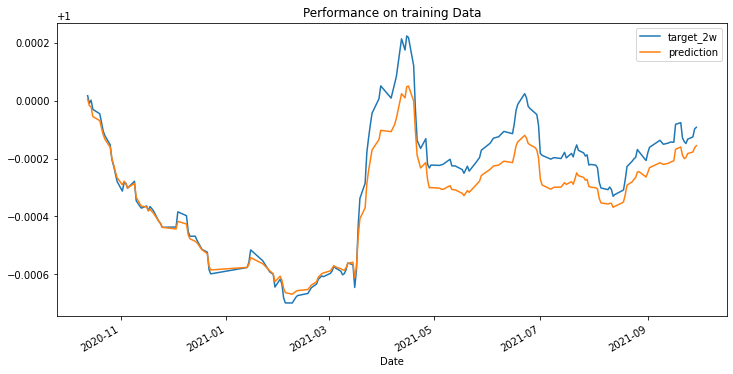

In [39]:
fix, ax = plt.subplots(figsize=(12,6))
(1+y_train).cumprod().plot(ax=ax, legend="target_5d")
(1 + pd.Series(rf.predict(X_train), index=y_train.index, name="prediction")).cumprod().plot(ax=ax, legend="prediction")
ax.set_title("Performance on training Data");

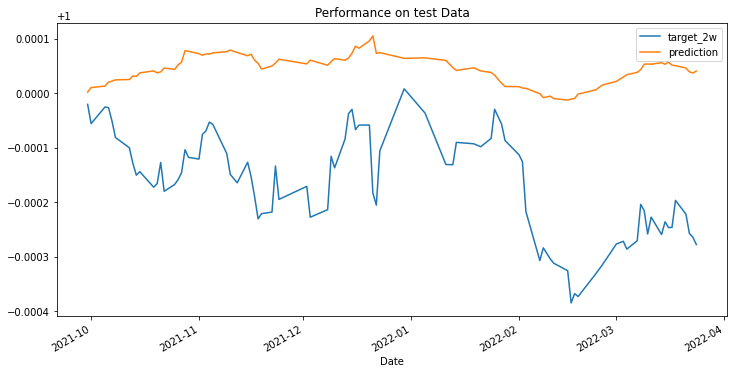

In [40]:
fix, ax = plt.subplots(figsize=(12,6))
(1+y_test).cumprod().plot(ax=ax, legend="target_5d")
(1 + pd.Series(rf.predict(X_test), index=y_test.index, name="prediction")).cumprod().plot(ax=ax, legend="prediction")
ax.set_title("Performance on test Data");

* The model was capable of predicting the evolution of the target

### the top 20 indicators

<BarContainer object of 19 artists>

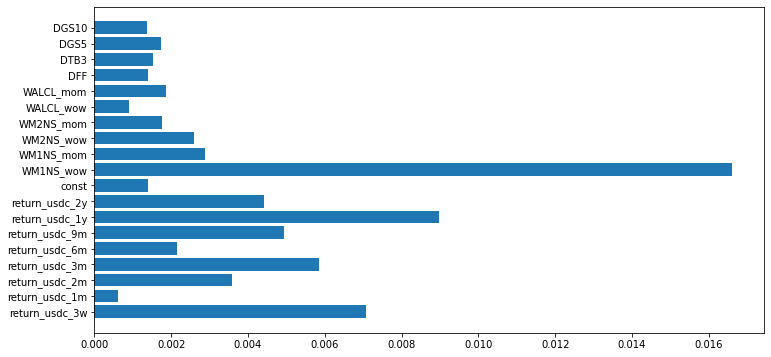

In [41]:
fix, ax = plt.subplots(figsize=(12,6))
ax.barh(X_train.columns[1:20], rf.feature_importances_[1:20])

# 4.Alpha Signal using Machine Learning

The alpha signal generated by the model for the bnb crypto is are the predictions of the model

In [42]:
alpha_vector = rf.predict(X_test)

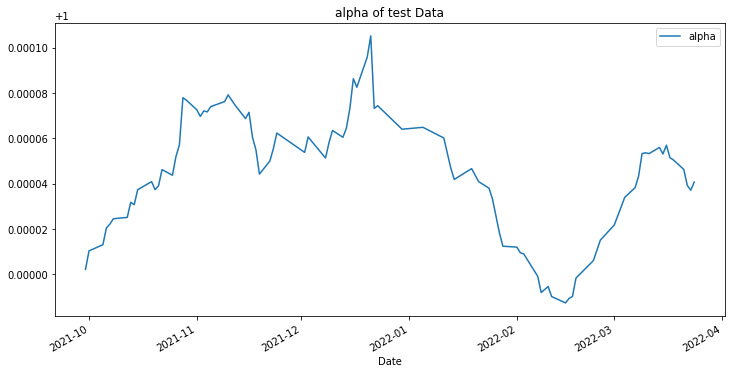

In [43]:
fix, ax = plt.subplots(figsize=(12,6))
(1 + pd.Series(alpha_vector, index=y_test.index, name="alpha")).cumprod().plot(ax=ax, legend="prediction")
ax.set_title("alpha of test Data");

# Strategy Definition

* add sell buy signal from the alpha generated by the AI

In [49]:
result_df_usdc = pd.DataFrame(y_test)
result_df_usdc["alpha_AI"] = alpha_vector
result_df_usdc.head()

,target_2w,alpha_AI
Date,,
2021-09-30,-0.000021,0.000002
2021-10-01,-0.000035,0.000008
2021-10-05,0.000031,0.000003
2021-10-06,-0.000001,0.000007
2021-10-07,-0.000025,0.000002


In [50]:
result_df_usdc["signal"] = pd.qcut(result_df_usdc["alpha_AI"], q=3, labels=False).replace({
    0:"SELL",
    1:"HOLD",
    2:"BUY"
})
result_df_usdc["buy"] = result_df_usdc["signal"]=="BUY"
result_df_usdc["sell"] = result_df_usdc["signal"]=="SELL"
result_df_usdc = result_df_usdc.join(df_usdc["Close"])


In [51]:
result_df_usdc.head()

,target_2w,alpha_AI,signal,buy,sell,Close
Date,,,,,,
2021-09-30,-0.000021,0.000002,HOLD,False,False,1.000140
2021-10-01,-0.000035,0.000008,BUY,True,False,0.999545
2021-10-05,0.000031,0.000003,HOLD,False,False,0.999849
2021-10-06,-0.000001,0.000007,BUY,True,False,0.999990
2021-10-07,-0.000025,0.000002,HOLD,False,False,1.000023


# Evaluation

In [52]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
from enum import Enum


class Transaction(Enum):
    BUY = 1
    SELL = -1
    HOLD = 0

def TestStrategyLOnly(strategy, productPrice, capital):

    portfolio = pd.DataFrame(columns=['value', 'cash', 'equity', 'transaction'])
    portfolio0 = {'value': capital, 'cash': capital, 'equity': 0, 'transaction': Transaction.HOLD}
    portfolio = portfolio.append(portfolio0, ignore_index=True)

    lastTransaction = Transaction.HOLD

    for i in range(0, len(productPrice)):

        if portfolio is None:
            portfolio = pd.DataFrame(columns=['value', 'cash', 'equity', 'transaction'])
            portfolio = portfolio.append(portfolio0, ignore_index=True)

        if portfolio.value.values[-1] <= 0:
            break

        elif strategy[i] == 2 and lastTransaction != Transaction.BUY:
            portfolio = buyequity(portfolio, productPrice[i])
            lastTransaction = Transaction.BUY

        elif strategy[i] == 0 and lastTransaction == Transaction.BUY:
            portfolio = sellEquityNoShort(portfolio, productPrice[i])
            lastTransaction = Transaction.SELL

        else:
            portfolio1 = {'value': portfolio.cash.values[-1] + portfolio.equity.values[-1] * productPrice[i],
                          'cash': portfolio.cash.values[-1], 'equity': portfolio.equity.values[-1],
                          'transaction': Transaction.HOLD}
            portfolio = portfolio.append(portfolio1, ignore_index=True)

    return portfolio


def TestStrategyLOnlyBuySellSignals(buySignals, sellSignals, productPrice, capital):
    strategy = [x + y for (x, y) in zip([1]*len(buySignals), buySignals)]
    strategy = [x - y for (x, y) in zip(strategy, sellSignals)]

    return TestStrategyLOnly(strategy, productPrice, capital)


def buyequity(portfolio, price):
    if portfolio.value.values[-1] <= 0 or portfolio.cash.values[-1] <= 0:
        return None
    equitytemp = portfolio.equity.values[-1] + portfolio.cash.values[-1] / price

    portfoliotemp = {'value': equitytemp * price, 'cash': 0, 'equity': equitytemp, 'transaction': Transaction.BUY}
    portfolio = portfolio.append(portfoliotemp, ignore_index=True)
    return portfolio


def sellEquityNoShort(portfolio, price):

    if portfolio.equity.values[-1] <= 0:
        portfolioTemp = {'value': portfolio.equity.values[-1] * price + portfolio.cash.values[-1],
                         'cash': portfolio.cash.values[-1], 'equity': portfolio.equity.values[-1],
                         'transaction': Transaction.HOLD}

    else:
        portfolioTemp = {'value': portfolio.equity.values[-1] * price, 'cash': portfolio.equity.values[-1] * price,
                         'equity': 0, 'transaction': Transaction.SELL}

    portfolio = portfolio.append(portfolioTemp, ignore_index=True)
    return portfolio


def volatility(portfolioValue):
    volTemp = sum((np.log(portfolioValue[i] / portfolioValue[i - 1])) ** 2 for i in range(1, len(portfolioValue)))
    return np.sqrt(volTemp)  # /len(portfolioValue)


def sharpRatio(portfolio, riskFreeRate):
    if portfolio[0] == 0:
        return None
    stdv = volatility(portfolio)
    if stdv == 0:
        return 0
    returns = (portfolio[-1] - portfolio[0]) / portfolio[0] - riskFreeRate
    return returns / stdv

def TradingResults(portfolio):
    if len(portfolio['value'].values) == 0:
        return None
    gains = portfolio['value'].values[-1] / portfolio['value'].values[0] - 1
    vol = volatility(portfolio['value'].values)
    drawdowns = AllDrawDowns(portfolio['value'].values)
    drawdown = MaxDrawDown(drawdowns)
    drawdownDuration = MaxDrawDownDuration(drawdowns)

    return {"gains": gains,
            'volatility': vol,
            "MaxDrawDown": drawdown,
            "MaxDrawDownDuration": drawdownDuration}


def LocalMax(portfolioValue):  # Returns al local maxims in a time series
    # smoothedGains = savgol_filter(portfolioValue, window_size, poly_order)  we need to verify if it optimize
    # runtime without affecting performance
    maxlocindex = np.array(argrelextrema(portfolioValue, np.greater)[0])

    return [portfolioValue[k] for k in maxlocindex], np.array(maxlocindex)


def ConsecutiveMaxOnly(maxloc, maxlocIndex):  # Returns maximas by in an increasing order
    if len(maxloc) != len(maxlocIndex):
        raise ValueError("local maxima and local maxima arrays must have the same length")

    k = 0
    while k < len(maxloc) - 1:
        if maxloc[k] > maxloc[k + 1]:
            maxloc = np.delete(maxloc, k + 1)
            maxlocIndex = np.delete(maxlocIndex, k + 1)
        else:
            k += 1
    return maxloc, maxlocIndex


def DrawDown(series):  # Returns DrawDown and DrawDown duration, if portfolio did not recoup initial value
    if len(series) <= 1:
        return 0, 0
    elif np.argmax(series) == 0:
        return (series[0] - min(series))*100/series[0], len(series)
    else:
        return ((series[0] - min(series))*100/series[0]), np.argmax(series > series[0])


def AllDrawDowns(portfoliovalue):  # Return all drawdowns of the portfolio
    localmax, localmaxindices = LocalMax(portfoliovalue)
    localmax, localmaxindices = ConsecutiveMaxOnly(localmax, localmaxindices)
    drawdowns = pd.DataFrame(columns=['start', 'low', 'end', 'drawdown', 'duration'])

    if len(localmaxindices) == 0:
        return drawdowns

    for k in range(0, len(localmaxindices)-1):
        temp = portfoliovalue[localmaxindices[k]:localmaxindices[k + 1]+1]
        drawdowntemp, drawdowndurationtemp = DrawDown(temp)
        drawdowns = drawdowns.append({'start': int(localmaxindices[k]), 'low': localmaxindices[k] + np.argmin(temp),
                                      'end': localmaxindices[k] + drawdowndurationtemp,
                                      'drawdown': drawdowntemp, 'duration': drawdowndurationtemp}
                                     , ignore_index=True)

    temp = portfoliovalue[localmaxindices[len(localmaxindices)-1]:]
    drawdowntemp, drawdowndurationtemp = DrawDown(temp)
    drawdowns = drawdowns.append({'start': int(localmaxindices[len(localmaxindices)-1]),
                                  'low': localmaxindices[len(localmaxindices)-1] + np.argmin(temp),
                                  'end': localmaxindices[len(localmaxindices)-1] + drawdowndurationtemp,
                                  'drawdown': drawdowntemp, 'duration': drawdowndurationtemp}
                                 , ignore_index=True)
    return drawdowns


def MaxDrawDown(alldrawdowns):
    if len(alldrawdowns) == 0:
        return None

    return alldrawdowns.loc[alldrawdowns['drawdown'].idxmax()]


def MaxDrawDownDuration(alldrawdowns):
    if len(alldrawdowns) == 0:
        return None

    return alldrawdowns.loc[alldrawdowns['duration'].idxmax()]

## calculate portfolio

The initial portfolio budget is 1_000_000

In [53]:
portfolio = TestStrategyLOnlyBuySellSignals(result_df_usdc["buy"].map(int).to_list(),
                                            result_df_usdc["sell"].map(int).to_list(),
                                            result_df_usdc["Close"].to_list(), 1_000_000)
portfolio = portfolio.iloc[1:,:].astype({
    "value":float,
})
portfolio.index = result_df_usdc.index

In [54]:
portfolio

,value,cash,equity,transaction
Date,,,,
2021-09-30,1.000000e+06,1000000,0,Transaction.HOLD
2021-10-01,1.000000e+06,0,1000455.207119,Transaction.BUY
2021-10-05,1.000304e+06,0,1000455.207119,Transaction.HOLD
2021-10-06,1.000445e+06,0,1000455.207119,Transaction.HOLD
2021-10-07,1.000478e+06,0,1000455.207119,Transaction.HOLD
...,...,...,...,...
2022-03-18,9.950241e+05,995024.117381,0,Transaction.HOLD
2022-03-21,9.950241e+05,995024.117381,0,Transaction.HOLD
2022-03-22,9.950241e+05,995024.117381,0,Transaction.HOLD


## Portfolio Value (monthly)

In [55]:
portfolio.resample("1M").agg({"value":np.mean})

,value
Date,
2021-09-30,1.000000e+06
2021-10-31,1.000071e+06
2021-11-30,9.996283e+05
2021-12-31,9.971392e+05
2022-01-31,9.954831e+05
2022-02-28,9.955313e+05
2022-03-31,9.953633e+05


## Percentage of winning trades vs Losing trades (monthly)

In [58]:
buy_transactions = np.where(np.asanyarray([e.name for e in portfolio['transaction']]) == 'BUY')[0]
buy_transaction_values = [portfolio['value'].values[k] for k in buy_transactions]

sell_transactions = np.where(np.asanyarray([e.name for e in portfolio['transaction']]) == 'SELL')[0]
sell_transaction_values = [portfolio['value'].values[k] for k in sell_transactions]

nb_transactions = len(np.where(np.asanyarray([e.name for e in portfolio['transaction']]) == 'BUY')[0])
print('Total number of transactions : ', nb_transactions)
print('rendement final : ', (portfolio['value'].values[-1]/portfolio['value'].values[0]-1)*100, '%')
print('rendement de la BnH : ', (result_df_usdc.Close.values[-1]/result_df_usdc.Close.values[0] - 1)*100, '%')

if len(sell_transaction_values) != len(buy_transaction_values):
    sell_transaction_values.append(portfolio['value'].values[-1])

transactions_delta = np.array(sell_transaction_values) - np.array(buy_transaction_values)

winning_transactions = [k for k in transactions_delta if k >= 0]
losing_transactions = [k for k in transactions_delta if k < 0]

if nb_transactions == 0:
    winning_percent = 0
    losing_percent = 0
else :
    winning_percent = len(winning_transactions)/nb_transactions
    losing_percent = len(losing_transactions)/nb_transactions
print('number of winning transactions is : ', len(winning_transactions))
print('percentage of winning transactions is : ', winning_percent)
print('average winnings in dollars : ', np.mean(winning_transactions))

print('number of losing transactions is : ', len(losing_transactions))
print('percentage of losing transactions is : ', losing_percent)
print('average losings in dollars : ', np.mean(losing_transactions))

Total number of transactions :  10
rendement final :  -0.4975882618624805 %
rendement de la BnH :  -0.04349391085248788 %
number of winning transactions is :  2
percentage of winning transactions is :  0.2
average winnings in dollars :  77.24068908015033
number of losing transactions is :  8
percentage of losing transactions is :  0.8
average losings in dollars :  -641.2954995981418


### Standard deviation and sharp ratio of the returns 

In [59]:
def volatility(portfolioValue):
    volTemp = sum((np.log(portfolioValue[i] / portfolioValue[i - 1])) ** 2 for i in range(1, len(portfolioValue)))
    return np.sqrt(volTemp)  # /len(portfolioValue)


def sharpRatio(portfolio, riskFreeRate):
    if portfolio[0] == 0:
        return None
    stdv = volatility(portfolio)
    if stdv == 0:
        return 0
    returns = (portfolio[-1] - portfolio[0]) / portfolio[0] - riskFreeRate
    return returns / stdv

In [60]:
volatility(portfolio["value"].values)

0.004404115180658926

In [61]:
sharpRatio(portfolio["value"].values, 0.0165)

-4.876321744022076

## Strategy annualized return

In [62]:
gains = (portfolio["value"].values[-1] - portfolio["value"].values[0])/portfolio["value"].values[0]
print("gains: ", gains)

print("annualized return : ", (gains + 1)**(1/5) + 1)

gains:  -0.004975882618624834
annualized return :  1.9990028367893768


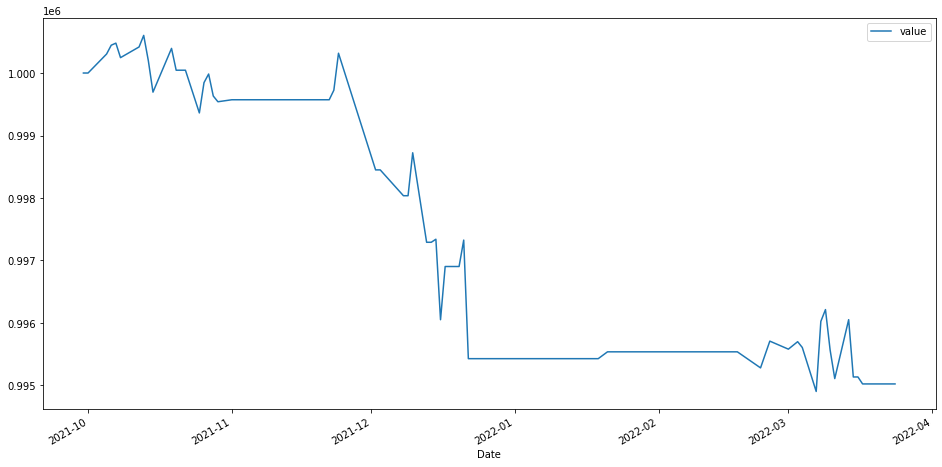

In [63]:
portfolio.plot(y="value", figsize=(16,8));